### Replicating the plots in the documentation in https://github.com/sisl/PGFPlots.jl

In [33]:
import PGFPlotsX: Axis, Plot, Plot3, @pgf, PolarAxis,
                  Table, Expression, Coordinates, Graphics
using LaTeXStrings

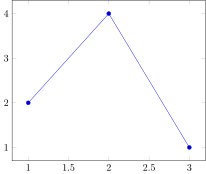

In [34]:
x = [1,2,3]
y = [2, 4, 1]
Plot(Coordinates(x, y))

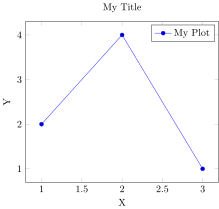

In [35]:
@pgf axis = Axis(Plot(Coordinates(x, y); label = "My Plot"),
    {
        xlabel = "X",
        ylabel = "Y",
        title = "My Title",
    })

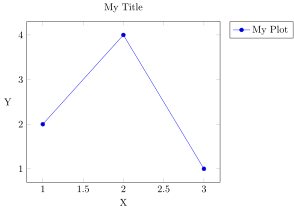

In [36]:
# A "pgf object" can be copied and new options can be merged into an existing pgf object
axis_new = copy(axis)
new_options = @pgf {
    ylabel_style = { rotate = -90, }
    legend_style = { at = { "(1.05, 1.0)" } 
                     anchor = "north west" }
    }

merge!(axis_new, new_options)
axis_new

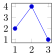

In [37]:
# Can set options using `Pair`s or key => value, but usually more convenient with @pgf macro
Axis(Plot(Coordinates(x, y)), "width" => "3 cm", "height" => " 3 cm")

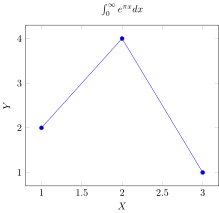

In [38]:
@pgf Axis(Plot(Coordinates(x, y)),
    {
        xlabel = L"X",
        ylabel = L"Y",
        title = L"\int_0^\infty e^{\pi x}dx",
    })

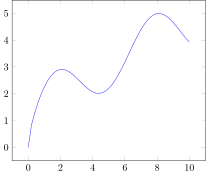

In [39]:
Plot(Coordinates(linspace(0, 10, 51), 
                 x -> sqrt(2* x) + sin(x)), 
    "mark" => "none")

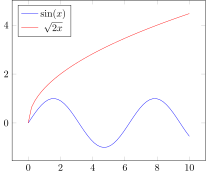

In [40]:
x = linspace(0, 10)
@pgf Axis([
     Plot(Coordinates(x, sin), { mark = "none" }; label = L"\sin(x)"),
     Plot(Coordinates(x, x -> sqrt(2*x)), { mark = "none" }; label = L"\sqrt{2x}")
    ], {
        legend_pos = "north west"
    })


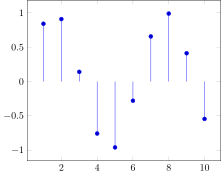

In [41]:
Plot(Coordinates(1:10, sin), "ycomb")

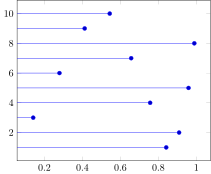

In [42]:
Plot(Coordinates(abs.(sin.(1:10)), 1:10), "xcomb")

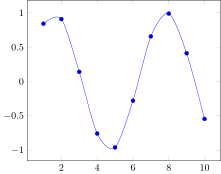

In [43]:
Plot(Coordinates(1:10, sin), "smooth")

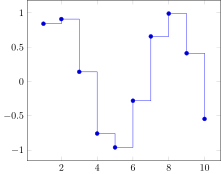

In [44]:
Plot(Coordinates(1:10, sin), "const plot")

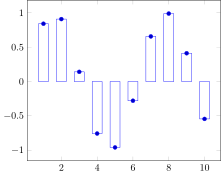

In [45]:
Plot(Coordinates(1:10, sin), "ybar")

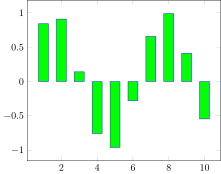

In [46]:
@pgf Plot(Coordinates(1:10, sin), {ybar, fill = "green", mark = "none"})

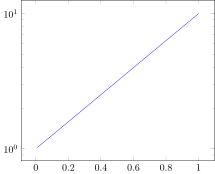

In [47]:
x = 0.01:0.01:1
Axis(Plot(Coordinates(x, 10.^x), "mark" => "none"), "ymode" => "log")

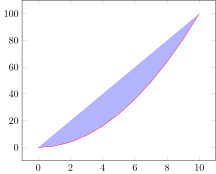

In [48]:
x = 0:10
@pgf Plot(Coordinates(x, x.^2), {red, fill = "blue", fill_opacity = 0.3, mark = "none"})

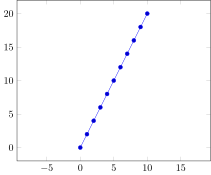

In [49]:
x = 0:10
@pgf Axis(Plot(Coordinates(x, 2.*x)), 
    { 
        xmin = 0,
        xmax = 10, 
        axis_equal,
    }
)

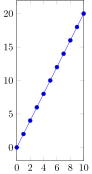

In [50]:
x = 0:10
@pgf Axis(Plot(Coordinates(x, 2.*x)), 
    { 
        xmin = 0,
        xmax = 10, 
        axis_equal_image,
    }
)

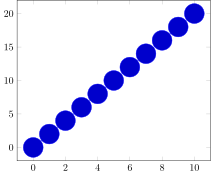

In [51]:
x = 0:10
@pgf Plot(Coordinates(x, 2.*x), { mark_size = 10 })

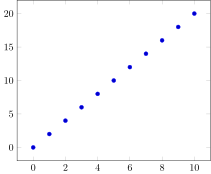

In [52]:
x = 0:10
@pgf Plot(Coordinates(x, 2.*x), { only_marks })

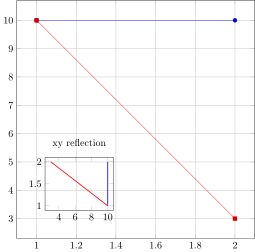

In [53]:
@pgf begin
a1 = Axis([Plot(Coordinates([1, 2], [10, 10]), { blue }),
           Plot(Coordinates([1, 2], [10, 3]),  { red })],
    {
        width = "10cm",
        height = "10cm",
        grid = "both"
    }
)
    
a2 = Axis([Plot(Coordinates([10,10], [1, 2]), { blue, no_marks, thick }),
           Plot(Coordinates([10,3],  [1, 2]), { red , no_marks, thick})],
    {
        width = "4cm",
        xshift = "1cm",
        yshift = "1cm",
        title = "xy reflection"    
    }
)     
end

[a1, a2]

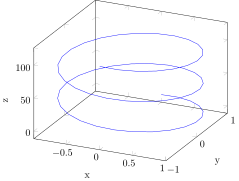

In [54]:
t = rad2deg.(linspace(0,5pi,60))
x = sind.(t)
y = cosd.(t)
z = 2t/(5pi)
@pgf begin
p = Plot3(Coordinates(x, y, z), { mark = "none" })
Axis(p,
    {
        xlabel = "x"
        ylabel = "y"
        zlabel = "z"
    })
end

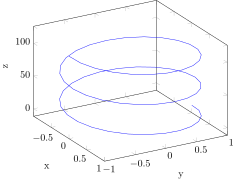

In [55]:
@pgf Axis(p,
    {
        view = (60, 30)
        xlabel = "x"
        ylabel = "y"
        zlabel = "z"
    })

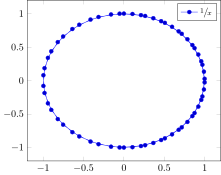

In [56]:
push!(PGFPlotsX.CUSTOM_PREAMBLE, "\\usepackage{xfrac}")
Axis(Plot(Coordinates(x, y); label = L"\sfrac{1}{x}"))

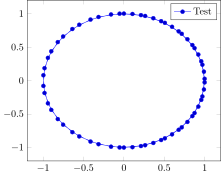

In [57]:
empty!(PGFPlotsX.CUSTOM_PREAMBLE)
Axis(Plot(Coordinates(x, y); label = "Test"))

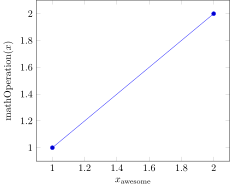

In [58]:
empty!(PGFPlotsX.CUSTOM_PREAMBLE)

push!(PGFPlotsX.CUSTOM_PREAMBLE, "\\usepackage{amsmath}")
@pgf a = Axis(Plot(Coordinates([1, 2], [1,2])), 
    {
        xlabel = L"x_\text{awesome}",
        ylabel = L"\text{mathOperation}(x)"
    }
)

In [59]:
using Contour
x = -2:0.1:2
f = (x, y) -> x * exp(-x^2 - y^2)
z = f.(x, x');

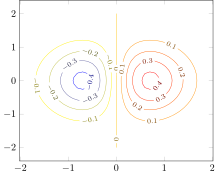

In [60]:
levels = -0.4:0.1:4
@pgf p = Plot(Table(contours(x, x, z, levels)), { contour_prepared }; incremental = false)

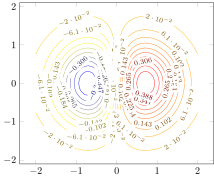

In [61]:
levels = 20
@pgf p = Plot(Table(contours(x, x, z, levels)), { contour_prepared }; incremental = false)

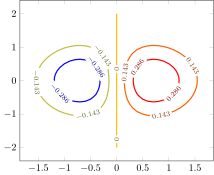

In [62]:
@pgf p = Plot(Table(contours(x, x, z, 5)), {contour_prepared, style => "very thick" }; incremental = false)

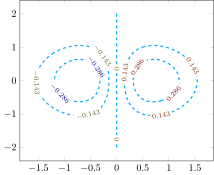

In [63]:
@pgf p = Plot(Table(contours(x, x, z, 5)), 
    {
        contour_prepared = {
            draw_color = "cyan"
        }, 
        style => "very thick", 
        dashed,
    }; incremental = false
)

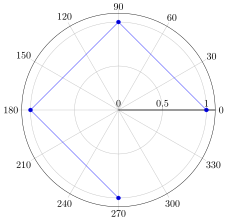

In [64]:
PolarAxis(Plot(Coordinates([0, 90, 180, 270], [1, 1, 1, 1])))